## Fuzzy

In [58]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_feather('Data/fuzzy_test_data')

df = df.loc[df['flow_rate'] == 0.6]

df.reset_index(drop=True).head()

,colormap,flow_rate,voltage,spray_mode
0,blue,0.6,4501.51,Intermittent
1,blue,0.6,4501.51,Intermittent
2,blue,0.6,4501.51,Intermittent
3,blue,0.6,4501.51,Intermittent
4,blue,0.6,4601.34,Intermittent


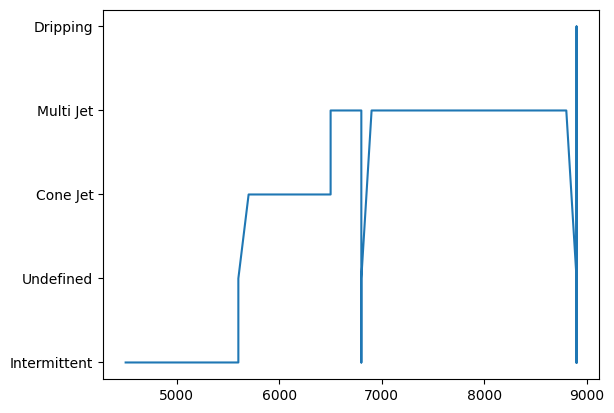

In [60]:
plt.plot(df['voltage'], df['spray_mode'])
plt.show()


In [61]:
# corona_sparks

dripping_median = df['voltage'].loc[df['spray_mode'] == 'Dripping'].median()
dripping_min = df['voltage'].loc[df['spray_mode'] == 'Dripping'].min()
dripping_max = df['voltage'].loc[df['spray_mode'] == 'Dripping'].max()

print("dripping median: ", dripping_median)
print("dripping min: ", dripping_min)
print("dripping max: ", dripping_max)
print("----------")


# Intermittent

intermittent_median = df['voltage'].loc[df['spray_mode'] == 'Intermittent'].median()
intermittent_min = df['voltage'].loc[df['spray_mode'] == 'Intermittent'].min()
intermittent_max = df['voltage'].loc[df['spray_mode'] == 'Intermittent'].max()

print("intermittent median: ", intermittent_median)
print("intermittent min: ", intermittent_min)
print("intermittent max: ", intermittent_max)
print("----------")

# Cone Jet

cone_jet_median = df['voltage'].loc[df['spray_mode'] == 'Cone Jet'].median()
cone_jet_min = df['voltage'].loc[df['spray_mode'] == 'Cone Jet'].min()
cone_jet_max = df['voltage'].loc[df['spray_mode'] == 'Cone Jet'].max()

print("cone_jet median: ", cone_jet_median)
print("cone_jet min: ", cone_jet_min)
print("cone_jet max: ", cone_jet_max)
print("----------")

# Multi Jet

multi_jet_median = df['voltage'].loc[df['spray_mode'] == 'Multi Jet'].median()
multi_jet_min = df['voltage'].loc[df['spray_mode'] == 'Multi Jet'].min()
multi_jet_max = df['voltage'].loc[df['spray_mode'] == 'Multi Jet'].max()

print("multi_jet median: ", multi_jet_median)
print("multi_jet min: ", multi_jet_min)
print("multi_jet max: ", multi_jet_max)
print("----------")



dripping median:  8900.96
dripping min:  8900.96
dripping max:  8900.96
----------
intermittent median:  5301.19
intermittent min:  4501.51
intermittent max:  8900.96
----------
cone_jet median:  6101.23
cone_jet min:  5701.4
cone_jet max:  6501.38
----------
multi_jet median:  7701.22
multi_jet min:  6501.38
multi_jet max:  8800.91
----------


In [75]:

voltage = ctrl.Antecedent(np.arange(0, 10000, 1), 'voltage')
output = ctrl.Consequent(np.arange(-100, 100, 1), 'output')


# voltage['dripping'] = fuzz.trapmf(voltage.universe, [dripping_min ,dripping_median, dripping_median, dripping_max])
# voltage['intermittent'] = fuzz.trimf(voltage.universe, [intermittent_min, intermittent_median , intermittent_max])
# voltage['cone_jet'] = fuzz.trapmf(voltage.universe, [cone_jet_min, cone_jet_median - 100, cone_jet_median + 100, cone_jet_max])
# voltage['multi_jet'] = fuzz.trapmf(voltage.universe, [multi_jet_min, multi_jet_median - 100, multi_jet_median + 100, multi_jet_max])
# voltage['corona_spark'] = fuzz.trimf(voltage.universe, [multi_jet_max, multi_jet_max, multi_jet_max])

voltage['dripping'] = fuzz.trapmf(voltage.universe, [0 ,0, 1600, 2500])
voltage['intermittent'] = fuzz.trimf(voltage.universe, [2000, 3500 , 5000])
voltage['cone_jet'] = fuzz.trapmf(voltage.universe, [4500, 5500, 6000, 6500])
voltage['multi_jet'] = fuzz.trapmf(voltage.universe, [6000, 7000, 7500, 9000])
voltage['corona_spark'] = fuzz.trapmf(voltage.universe, [8000, 9000, 15000, 20000])

# Pythonic API
output['decrease'] = fuzz.trimf(output.universe, [-100, -50, 0])
output['stabilize'] = fuzz.trimf(output.universe, [-50, 0, 50])
output['increase'] = fuzz.trimf(output.universe, [0, 50, 100])

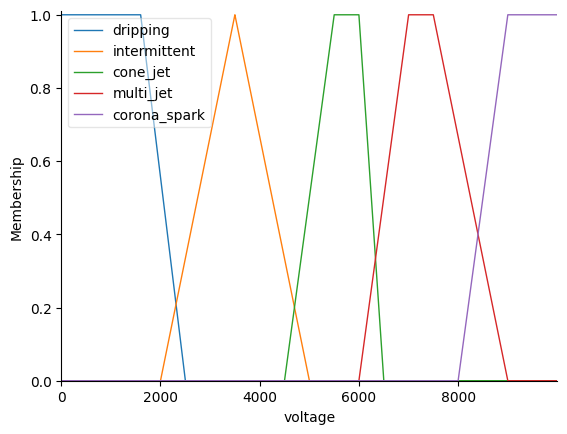

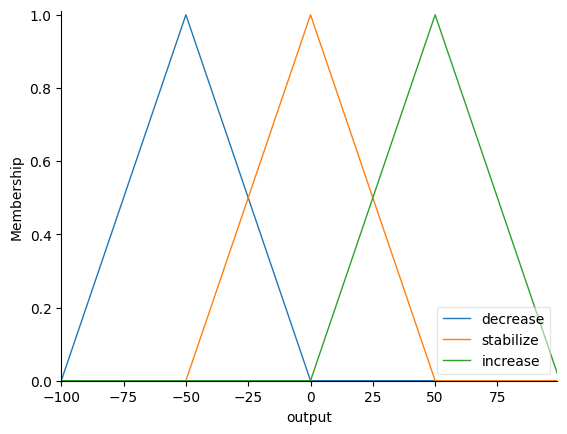

In [76]:

voltage.view()
output.view()

### Fuzzy rules

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

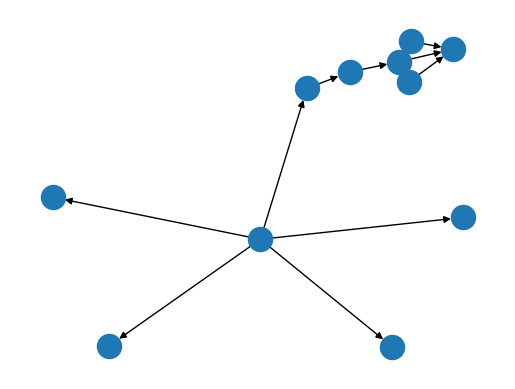

In [77]:
# Rules to stabilize in Cone Jet

rule1 = ctrl.Rule(voltage['dripping'], output['increase'])
rule2 = ctrl.Rule(voltage['intermittent'], output['increase'])
rule3 = ctrl.Rule(voltage['cone_jet'], output['stabilize'])
rule4 = ctrl.Rule(voltage['multi_jet'], output['decrease'])
rule5 = ctrl.Rule(voltage['corona_spark'], output['decrease'])

rule1.view()

### Control System Creation and Simulation

In [78]:
voltage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

PS_voltage = ctrl.ControlSystemSimulation(voltage_ctrl)

### Testing

Input voltage selected: 7000 V
Output change voltage in scale (-100,100):  49.98889750193792


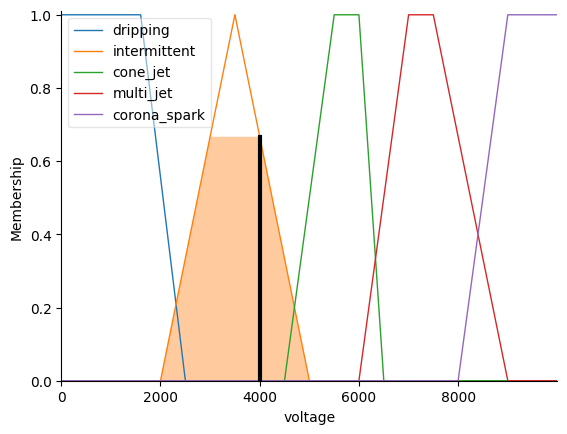

In [85]:

PS_voltage.input['voltage'] = 4000

PS_voltage.compute()

voltage.view(sim=PS_voltage)
print("Input voltage selected: 7000 V")
print ("Output change voltage in scale (-100,100): ", PS_voltage.output['output'])